## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  

For this project, i will work to understand the results of an A/B test run by an e-commerce website.  Mz goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [47]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [48]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [50]:
#In this dataset there are 5 columns and 294478 rows

c. The number of unique users in the dataset.

In [51]:
print("There are",df['user_id'].nunique(),"unique users in the dataset")

There are 290584 unique users in the dataset


d. The proportion of users converted.

In [52]:
print("the",df['converted'].mean()*100,"% of users are finally convert")

the 11.9659193556 % of users are finally convert


e. The number of times the `new_page` and `treatment` don't line up.

In [53]:
wrong_data=df.query('(group=="treatment" and landing_page!="new_page") or (group!="treatment" and landing_page=="new_page")') .count()

In [54]:
wrong_data

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [55]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [56]:
#We can see that there are no missing values at this dataset

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [57]:

df2=df.drop(df.query('(group=="treatment" and landing_page!="new_page") or (group!="treatment" and landing_page=="new_page")').index)

In [58]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0],df2[((df2['group'] != 'treatment') == (df2['landing_page'] != 'new_page')) == False].shape[0]

(0, 0)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [59]:
print("there are",df2['user_id'].nunique(),"unique ids in the new dataset")

there are 290584 unique ids in the new dataset


b. There is one **user_id** repeated in **df2**.  What is it?

In [60]:
dup=df2[df2.duplicated(['user_id'])]['user_id']
print("the id that is repeated is",dup)

the id that is repeated is 2893    773192
Name: user_id, dtype: int64


c. What is the row information for the repeat **user_id**? 

In [61]:
dupls=df2.query('(user_id=="773192")')
dupls

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [62]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [63]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [64]:
df2.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [65]:
#As we can see above the Ptreatment is 0.12

d. What is the probability that an individual received the new page?

In [66]:
print("there is a",(df2[df2['landing_page']=="new_page"]['user_id'].count()/df['user_id'].count())*100,"% propability an individual receive the new page")

there is a 49.3449425764 % propability an individual receive the new page


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

I dont thnink that there are any evidence that lead to this conclusion. I think that the probability of convertion is almost simmilar at both the pages. 

<a id='ab_test'></a>
### Part II - A/B Test





Null=Pold-Pnew>=0
Alter=Pold-Pnew<0

`2.` I assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore,  iassume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

I Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

I Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Finally, i´use the cells below to provide the necessary parts of this simulation. 

a. What is the **convert rate** for $p_{new}$ under the null? 

In [67]:
print("Under the  null hypothesis,  𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  both have true success rates equal to the converted success rate regardless of page.So if i want to find the Pnew i have to find the convertion rate of my full database")


Under the  null hypothesis,  𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  both have true success rates equal to the converted success rate regardless of page.So if i want to find the Pnew i have to find the convertion rate of my full database


In [68]:
null_mean=df2['converted'].mean()
null_mean

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [69]:
#under the null Pnew=Pold= Convertion rates mean

c. What is $n_{new}$?

In [70]:
new_page=df2.query('(landing_page=="new_page")')
Nnew=new_page['user_id'].count()
Nnew

145310

d. What is $n_{old}$?

In [71]:
old_page=df2.query('(landing_page=="old_page")')
Nold=old_page['user_id'].count()
Nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [72]:
new_page_converted=np.random.choice([0,1],Nnew, p=(null_mean,1-null_mean))


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [73]:
old_page_converted=np.random.choice([0,1],Nold,p=(null_mean,1-null_mean))

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [74]:
Pnew=new_page_converted.mean()
Pold=old_page_converted.mean()
Pnew-Pold

-0.001092183928410928

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [81]:
p_diffs=[]
for i in range(10000):
    new_page_converted=np.random.choice([0,1],Nnew, p=(null_mean,1-null_mean))
    old_page_converted=np.random.choice([0,1],Nold,p=(null_mean,1-null_mean))
    Pnew=new_page_converted.mean()
    Pold=old_page_converted.mean()
    p_diffs.append(Pnew-Pold)
    

In [76]:
#i need to find the difference betwin Pnew and Pold at my original data set
P_diff_original=new_page['converted'].mean()-old_page['converted'].mean()
P_diff_original

-0.0015782389853555567

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

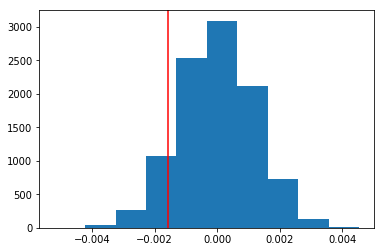

In [82]:
plt.hist(p_diffs)
plt.axvline(P_diff_original,color='r')


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [83]:
p_diffs=np.array(p_diffs)
1-(p_diffs > P_diff_original).mean()

0.096099999999999963

k. I What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In [84]:
print('The value we have compute in j. is calted P Value. It is the probability of observing one more extreme value in favor of the alternative hypothesis if the null hypothesis is true.In our case P-value is 0.09>a=0.05, so we have to reject the allternative hypothesis.')

The value we have compute in j. is calted P Value. It is the probability of observing one more extreme value in favor of the alternative hypothesis if the null hypothesis is true.In our case P-value is 0.09>a=0.05, so we have to reject the allternative hypothesis.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [85]:
import statsmodels.api as sm

convert_old = df2.query('(landing_page=="old_page")and (converted=="1")')['user_id'].count()
convert_new = df2.query('(landing_page=="new_page")and (converted=="1")')['user_id'].count()
n_old = df2.query('(landing_page=="old_page")')['user_id'].count()
n_new = df2.query('(landing_page=="new_page")')['user_id'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [86]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Because we have only two possible values (o,1) for each row, we have a logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [87]:
df2['intercept']=1
df2[['new_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [88]:
import statsmodels.api as sm
log=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        19:35:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [90]:
print('we can see that the coefficient of ab_page is only -0.02. This means that the convertion rate does not depent on which page we visit.')

we can see that the coefficient of ab_page is only -0.02. This means that the convertion rate does not depent on which page we visit.


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  

The p-value associated with ab_page is 0.19. is different from pvalue in Part two because the null hypothesis is different. In Part 2 the null hypothesis was that pold>=Pnew but in this part we assume that Pold is bigger than Pnew

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In [91]:
print('Maybe we can take in mind other factors like if there is any conection betwin the timestamp and the convertion rate. For example we can try if it is more possible a client to convert at the morning or night')

Maybe we can take in mind other factors like if there is any conection betwin the timestamp and the convertion rate. For example we can try if it is more possible a client to convert at the morning or night


g. Now along with testing if the conversion rate changes for different pages,i also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - 

In [92]:
dfc=pd.read_csv('countries.csv')
dfc.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [93]:
dfc['user_id'].count()-df2['user_id'].count()

0

In [94]:
df3=df2.set_index('user_id').join(dfc.set_index('user_id'))


In [95]:
df3.head()

,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [96]:
countries=df3['country'].unique()
countries=np.array(countries)
countries

array(['US', 'CA', 'UK'], dtype=object)

In [97]:
df3[['CA','UK','US']]=pd.get_dummies(df3['country'])
df3.head()

,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,CA,UK,US
user_id,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,0,1


In [99]:
regre=sm.Logit(df3['converted'],df3[['intercept','new_page','US','UK']])
resultsreg=regre.fit()
resultsreg.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 05 Jan 2019   Pseudo R-squ.:               2.323e-05
Time:                        19:36:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [100]:
1/np.exp(-0.0150),np.exp(0.0506),np.exp(0.0408)

(1.0151130646157189, 1.0519020483004984, 1.0416437559600236)

In [102]:
#For every unit for new_page decrease, convert will be 1.5% more possible
#For every unit for UK increases, convert is 5.2% more possible
# For every unit for US increases, convert is 4.2% more possible